In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol4_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control4_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control4_P2_7_18_24_stimulus_time0.csv'

north_pixel = 95
south_pixel = 414
east_pixel = 486
west_pixel = 146
shelter_x_pixel = 326
shelter_y_pixel = 385

#estimate for when mouse reaches shelter
escape_done = 3.73 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 2)
convert_time(time_path, coords, audio_path, 2)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

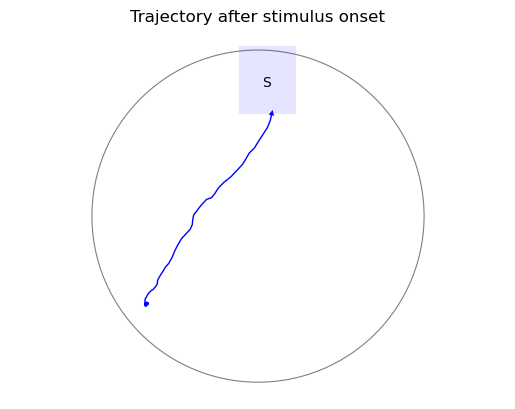

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

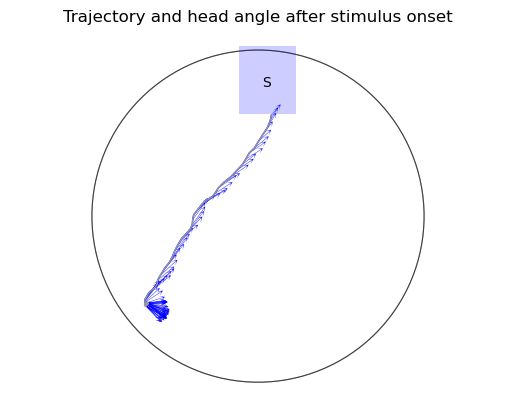

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

In [20]:
coord_scaled

,nose_x,nose_y,head_x,head_y,center_x,center_y,time_set,displacement,speed,delta_vector,head_angle,angle_speed
0,NaN,NaN,-32.660897,0.627607,-29.373790,0.420564,-432.670439,39.665536,NaN,NaN,NaN,NaN
1,NaN,NaN,-32.660897,0.672074,-29.373790,0.544069,-432.633331,39.589264,3.328277,0.123506,NaN,NaN
2,NaN,NaN,-32.660897,0.898492,-29.373790,0.590317,-432.593370,39.560765,1.157316,0.046248,NaN,NaN
3,NaN,NaN,-32.742420,0.898492,-29.552947,0.726334,-432.552794,39.618742,5.543671,0.224940,NaN,NaN
4,NaN,NaN,-32.772364,1.059690,-29.701339,0.875388,-432.512717,39.645550,5.248065,0.210327,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11430,19.437497,-5.885317,18.307118,-5.080575,15.625008,-4.323283,24.641037,32.380314,8.572023,0.343215,2.692161,13.791618
11431,18.173440,-6.476626,17.564750,-5.540433,15.406805,-4.323283,24.680985,32.287714,5.462192,0.218204,3.042371,8.766654
11432,17.778147,-6.769290,17.001811,-6.024763,15.336256,-4.371307,24.722701,32.301628,2.045804,0.085343,2.791622,-6.010850
11433,17.382853,-7.061953,16.834045,-6.259432,15.281920,-4.511771,24.761088,32.406553,3.923394,0.150607,2.990794,5.188514


In [21]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)

In [22]:
coord_scaled_smooth

,nose_x,nose_y,head_x,head_y,center_x,center_y,time_set,displacement,speed,delta_vector,head_angle,angle_speed
0,NaN,NaN,-32.660897,0.627607,-29.373790,0.420564,-432.670439,39.618357,NaN,NaN,NaN,NaN
1,NaN,NaN,-32.660897,0.672074,-29.373790,0.544069,-432.633331,39.616985,NaN,0.123506,NaN,NaN
2,NaN,NaN,-32.660897,0.898492,-29.373790,0.590317,-432.593370,39.619675,NaN,0.046248,NaN,NaN
3,NaN,NaN,-32.742420,0.898492,-29.552947,0.726334,-432.552794,39.633269,NaN,0.224940,NaN,NaN
4,NaN,NaN,-32.772364,1.059690,-29.701339,0.875388,-432.512717,39.662946,NaN,0.210327,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11430,19.437497,-5.885317,18.307118,-5.080575,15.625008,-4.323283,24.641037,32.428060,4.388552,0.343215,2.506455,5.343160
11431,18.173440,-6.476626,17.564750,-5.540433,15.406805,-4.323283,24.680985,32.400819,4.515605,0.218204,2.688211,4.624244
11432,17.778147,-6.769290,17.001811,-6.024763,15.336256,-4.371307,24.722701,32.399649,4.462844,0.085343,2.814997,3.301426
11433,17.382853,-7.061953,16.834045,-6.259432,15.281920,-4.511771,24.761088,32.416341,4.386390,0.150607,2.886858,2.056775


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

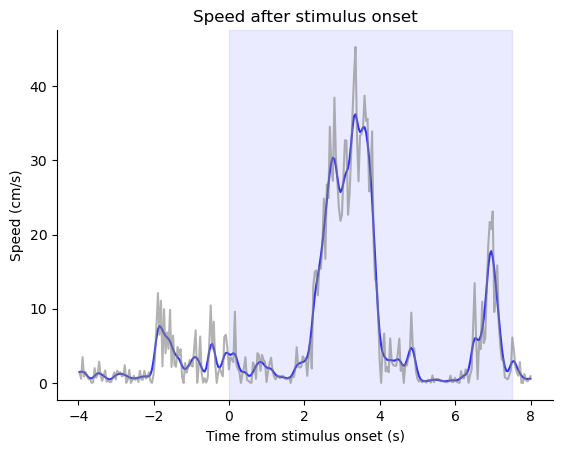

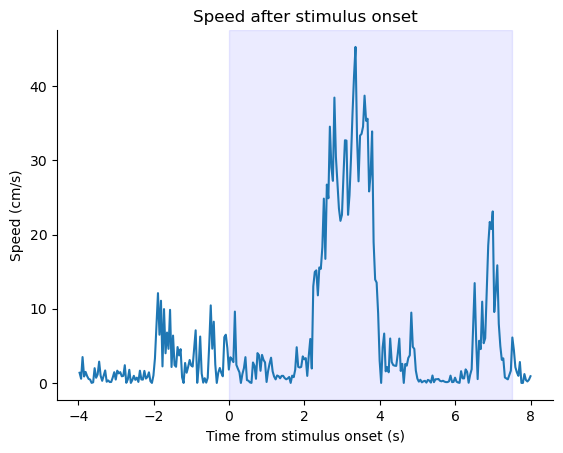

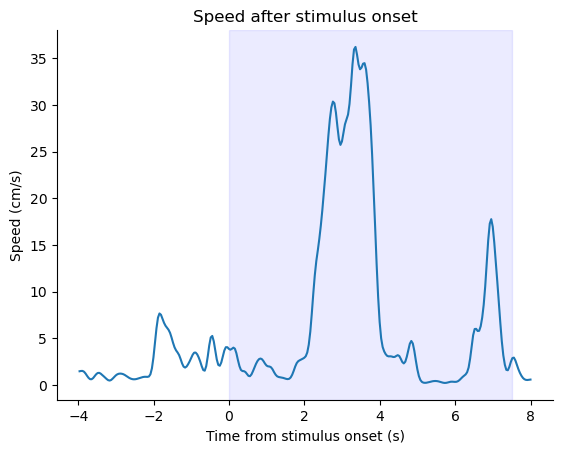

In [23]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, False, False, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

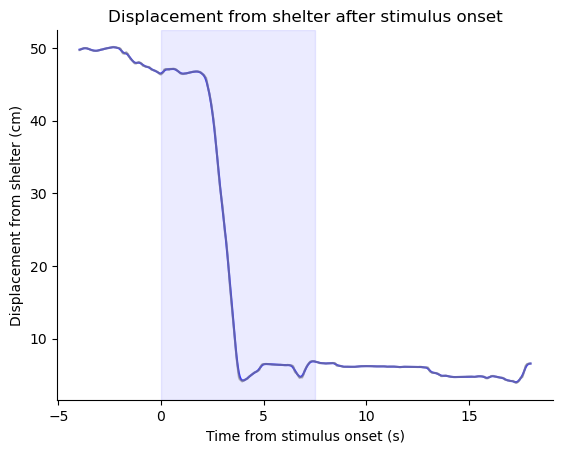

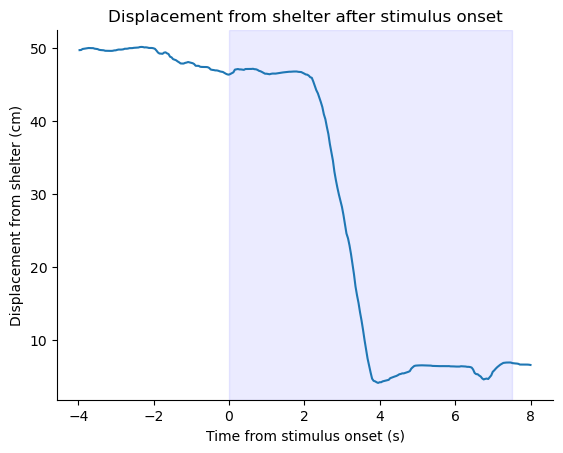

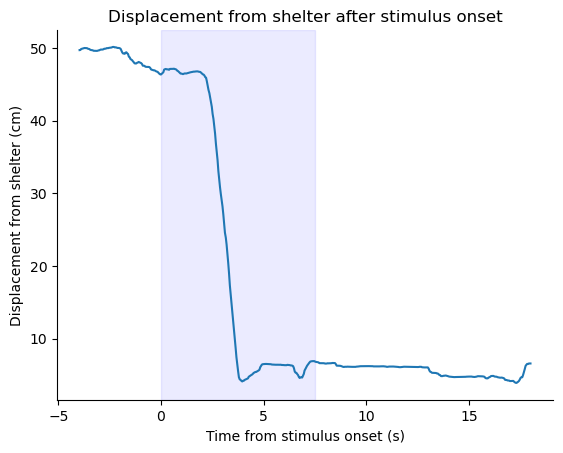

In [25]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 8, coord_scaled, False, False, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

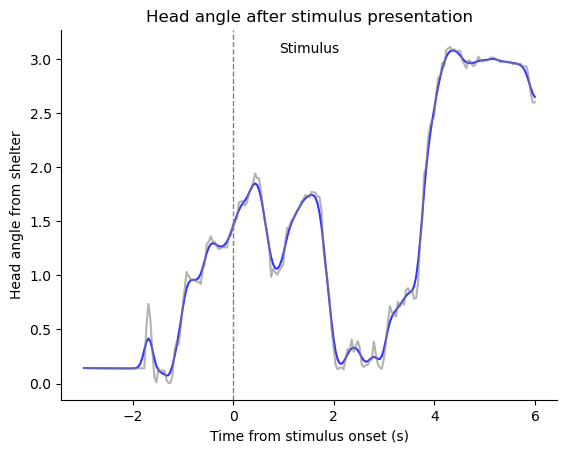

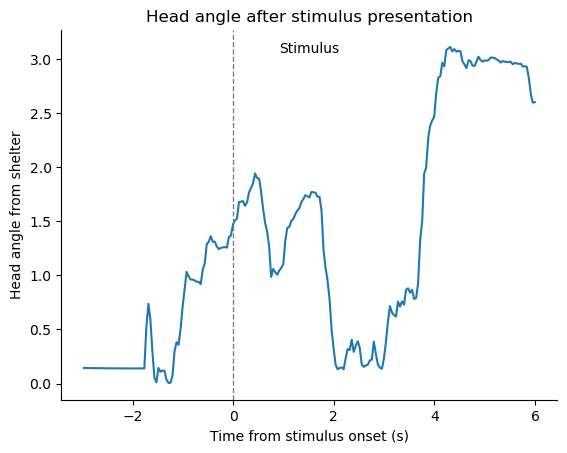

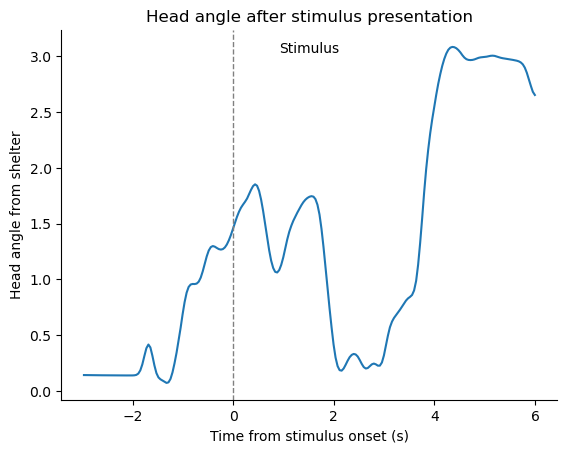

In [26]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [30]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [31]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [32]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
10980,10980,10980,NaN,NaN,0.780365,7.185778,22.674300,0.999986,6.503332,23.319857,...,0.999960,2.516594,19.870580,0.999994,6.636493,5.139968,5.681589,0.227264,NaN,NaN
10989,10989,10989,NaN,NaN,0.351425,8.555885,28.208533,0.999801,7.696588,28.339251,...,0.999918,5.417695,22.334099,0.999967,6.996608,5.647269,23.115893,0.917840,NaN,NaN
10990,10990,10990,NaN,NaN,0.126328,8.934123,28.607966,0.999565,8.022046,28.807883,...,0.999989,5.726695,22.805871,0.999985,7.036621,5.845297,9.553170,0.382251,NaN,NaN
10991,10991,10991,NaN,NaN,0.005076,9.220340,29.038619,0.983415,8.338185,29.249064,...,0.999958,5.806271,23.603213,0.999959,7.076608,6.081234,12.329217,0.493008,NaN,NaN
10992,10992,10992,NaN,NaN,0.000430,NaN,NaN,0.170286,8.652259,29.921483,...,0.999989,5.807919,24.108545,0.999985,7.117427,6.290632,15.853578,0.647127,NaN,NaN
10993,10993,10993,NaN,NaN,0.000410,NaN,NaN,0.059434,8.908653,30.151775,...,0.999993,5.955537,24.496476,0.999961,7.156928,6.449089,7.961648,0.314493,NaN,NaN
10994,10994,10994,NaN,NaN,0.000247,NaN,NaN,0.096084,8.960711,30.209624,...,0.999993,6.258349,24.674948,0.999765,7.197939,6.626398,4.958386,0.203348,NaN,NaN
10995,10995,10995,NaN,NaN,0.000380,NaN,NaN,0.036942,9.283885,30.374061,...,0.999992,6.448859,24.675531,0.999801,7.236787,6.746971,3.115277,0.121022,NaN,NaN
10996,10996,10996,NaN,NaN,0.000246,NaN,NaN,0.010981,9.541439,30.478805,...,0.999989,6.520009,24.781448,0.999790,7.276646,6.864360,3.309031,0.131895,NaN,NaN
10997,10997,10997,NaN,NaN,0.000358,NaN,NaN,0.016133,9.683696,30.478805,...,0.999982,6.520009,24.953676,0.999844,7.318425,6.893124,0.733497,0.030645,NaN,NaN


In [33]:

rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)
#normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


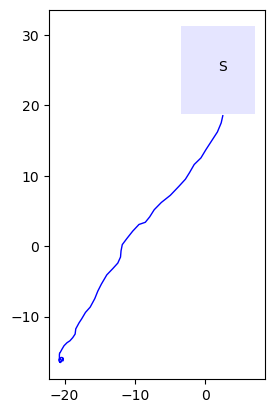

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [37]:
rotate

,rotated_x,rotated_y,rotated_shift_x,rotated__shift_y
0,-20.242102,-15.926711,-20.242102,-15.926711
1,-20.242102,-16.053639,-20.242102,-16.053639
2,-20.290891,-16.156548,-20.290891,-16.156548
3,-20.548333,-16.439483,-20.548333,-16.439483
4,-20.644784,-16.439483,-20.644784,-16.439483
...,...,...,...,...
88,0.069574,13.709622,0.069574,13.709622
89,0.912997,15.007943,0.912997,15.007943
90,1.700010,16.217948,1.700010,16.217948
91,2.238234,17.508466,2.238234,17.508466
